In [2]:
from flash_ansr import SkeletonPool, get_path
import os
import matplotlib.pyplot as plt
import numpy as np

In [3]:
test_sets = ['feynman', 'soose_nc', 'nguyen', 'pool_15']
column_names = {
    'feynman': 'Feynman',
    'soose_nc': 'SOOSE-NC',
    'nguyen': 'Nguyen',
    'pool_15': '  Pool-15'
}

In [4]:
test_set_paths = {test_set: os.path.join(get_path('data', 'ansr-data', 'test_set', test_set), 'skeleton_pool') for test_set in test_sets}

In [5]:
pools = {test_set: SkeletonPool.load(test_set_paths[test_set])[1] for test_set in test_sets}

Compiling Skeletons: 100%|██████████| 200/200 [00:00<00:00, 31191.37it/s]


Compiling Skeletons: 100%|██████████| 4999/4999 [00:00<00:00, 31757.90it/s]


/tmp/ipykernel_18316/405572339.py:27: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


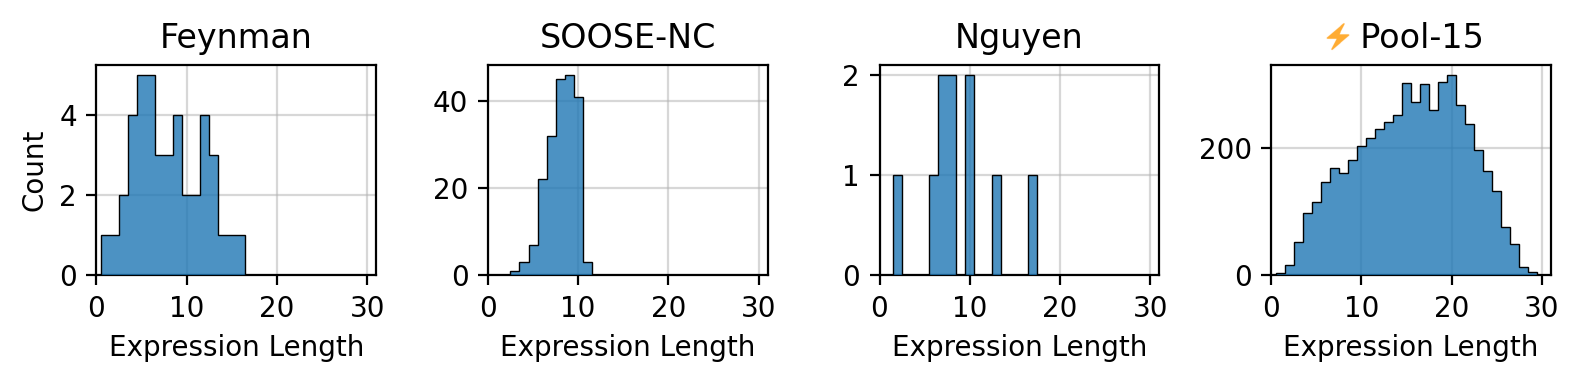

In [6]:
fig, axes = plt.subplots(1, 4, figsize=(8,2), dpi=200, sharex=True)

min_length = 0
max_length = max(max(len(s) for s in pool.skeletons) for pool in pools.values())

for i, (ax, pool, test_set) in enumerate(zip(axes.flat, pools.values(), test_sets)):
    pool = pools[test_set]
    ax.hist([len(s) for s in pool.skeletons], bins=np.arange(min_length, max_length + 1) - 0.5, zorder=4, alpha=0.8, linewidth=0, rasterized=True)
    ax.hist([len(s) for s in pool.skeletons], bins=np.arange(min_length, max_length + 1) - 0.5, zorder=6, histtype='step', edgecolor='k', linewidth=0.5)
    ax.set_title(column_names[test_set])
    ax.grid(alpha=0.5)
    ax.set_xlabel('Expression Length')
    if i == 0:
        ax.set_ylabel('Count')
    ax.set_xlim(min_length, max_length)
    ax.set_xticks(np.arange(min_length, max_length + 1, 10))

# Show the flash.png image next to the ANSR header
flash = plt.imread(get_path('assets', 'flash.png'))

# Create a new image with the flash.png image
# Apparently there is no feasable way to write emojis in matplotlib WTF?!
ax_image = fig.add_axes([0.77, 0.85, 0.08, 0.08], anchor='NE', zorder=10)
ax_image.imshow(flash)
ax_image.axis('off')

fig.tight_layout()

plt.savefig(get_path('results', 'data_analysis', create=True, filename='skeleton_length_histograms_test.svg'))